Populating the interactive namespace from numpy and matplotlib
(1, 8, 8, 4)


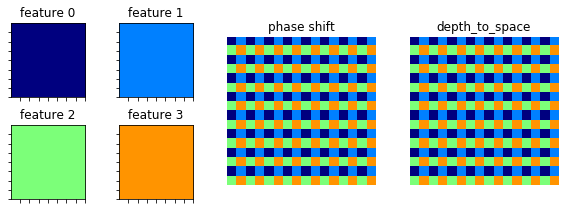

In [17]:
def _phase_shift(I, r):
    bsize, a, b, c = I.get_shape().as_list()
    bsize = tf.shape(I)[0] # Handling Dimension(None) type for undefined batch dim
    X = tf.reshape(I, (bsize, a, b, r, r))
    X = tf.transpose(X, (0, 1, 2, 4, 3))  # bsize, a, b, 1, 1
    X = tf.split(X, a, 1)  # a, [bsize, b, r, r]
    X = tf.concat([tf.squeeze(x, axis=1) for x in X],2)  # bsize, b, a*r, r
    X = tf.split(X, b, 1)  # b, [bsize, a*r, r]
    X = tf.concat([tf.squeeze(x, axis=1) for x in X],2)  # bsize, a*r, b*r
    return tf.reshape(X, (bsize, a*r, b*r, 1))

def _phase_shifter(I, r):
    bsize, a, b, c = I.get_shape().as_list()
    bsize = tf.shape(I)[0] # Handling Dimension(None) type for undefined batch dim
    X = tf.reshape(I, (bsize, a, b, r, r))
    X = tf.transpose(X, (0, 1, 2, 4, 3))  # bsize, a, b, 1, 1
    X = tf.split(X, a,1)  # a, [bsize, b, r, r]
    X = tf.concat([tf.squeeze(x, axis=1) for x in X],2)  # bsize, b, a*r, r
    X = tf.split(X, b,1)  # b, [bsize, a*r, r]
    X = tf.concat([tf.squeeze(x, axis=1) for x in X],2)  # bsize, a*r, b*r
    return tf.reshape(X, (bsize, a*r, b*r, 1))


def PS(X, r, color=False):
    if color:
        Xc = tf.split(X, 3, 3)
        X = tf.concat([_phase_shifter(x, r) for x in Xc], 3)
    else:
        X = _phase_shifter(X, r)
    return X

%pylab inline
import tensorflow as tf

# Feature map with shape [1, 8, 8, 4] with each feature map i having value i
x = np.ones((1, 8, 8, 4)) * np.arange(4)[None, None, None, :]
# Convert to a [1, 16, 16, 1] Tensor
y = tf.depth_to_space(tf.constant(x), 2)

sess = tf.InteractiveSession()
out = sess.run(y)

# Plot results
figure(figsize=(8, 3))
gs = GridSpec(2, 4, width_ratios=[1, 1, 2, 2])
for i in range(4):
  subplot(gs[i//2, i%2])
  imshow(x[:, :, :, i].squeeze(), cmap=cm.jet, vmin=0, vmax=4, interpolation='nearest'); 
  # Add ticks at pixels, annoyingly have to offset by 0.5 to line up with pixels
  xticks(0.5 + np.arange(8)); yticks(0.5 + np.arange(8));
  gca().set_xticklabels([]); gca().set_yticklabels([]);
  title('feature %d'%i)
  
  
subplot(gs[:, 2])
print(x.shape)
out_ps = sess.run(PS(tf.constant(x), 2))
imshow(out_ps.squeeze().T, cmap=cm.jet, vmin=0, vmax=4, interpolation='nearest'); 
axis('off')
title('phase shift')

subplot(gs[:, 3])
imshow(out.squeeze(), cmap=cm.jet, vmin=0, vmax=4, interpolation='nearest'); 
axis('off')
title('depth_to_space')


gcf().tight_layout()